##### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

[1] 모듈로딩 및 데이터 설정 <hr>

In [40]:
## 모듈 로딩

import cv2                              # ==> 이미지 데이터 ndarray
from PIL import Image                   # %pip install pillow ==> 이미지 데이터 JpegImage (객체)
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms      # pytorch 지원 이미지 변환 관련 모듈
from torchvision.transforms import v2
import torch

In [25]:
## 데이터 관련 설정
IMG_PATH='../image/'
IMG_FILE=IMG_PATH+'hun.jpg'

- openCV & pillow<br>

In [26]:
cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # BGR ==> RGB

pil_img = Image.open(IMG_FILE)

In [27]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- ndarray ==> Tensor

In [36]:
# 일반적인 텐서 생성 ==> [H, W, C]
cvTensor1 = torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')

cvTensor2 = torch.tensor(cv_img)
print(f'cvTensor12 : {cvTensor2.shape}, {cvTensor2.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서 / 위치 자동[C, H, W]
cvTensor2 = transforms.ToTensor()(cv_img)
print(f'cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([480, 640, 3]), 3D
cvTensor12 : torch.Size([480, 640, 3]), 3D
cvTensor2 : torch.Size([3, 480, 640]), 3D


In [33]:
## pillow => 1. array로 변환후 => 2. Tensor화 진행

# 일반적인 텐서 생성 ==> [H, W, C]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서 / 위치 자동[C, H, W]
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')

# PILToTensor 사용할 경우 한번에 (=>array=>Tensor)
pilTensor3 = transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D')

pilTensor1 : torch.Size([480, 640, 3]), 3D
pilTensor2 : torch.Size([3, 480, 640]), 3D
pilTensor3 : torch.Size([3, 480, 640]), 3D


- Tensor => Ndarray <br>

cvNP : (480, 640, 3), 3


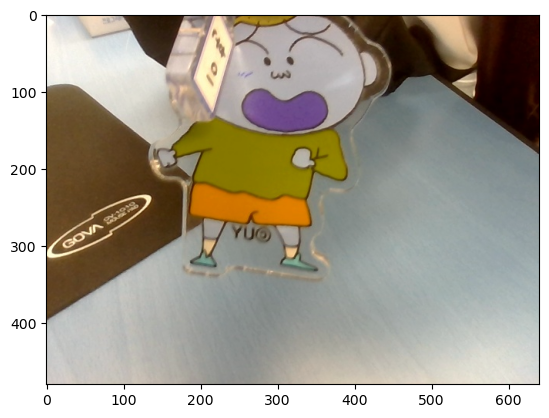

In [35]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}')

plt.imshow(cvNP)
plt.show()

In [43]:
type(v2.ToImage()(cv_img))

torchvision.tv_tensors._image.Image

In [45]:
v2.ToImage()(cv_img).shape

torch.Size([3, 480, 640])

In [47]:
pillIMG1 = transforms.ToPILImage()(pilTensor2)
print(f'{pillIMG1.width}, {pillIMG1.height}, {pillIMG1.mode}')
pillIMG1.show()

640, 480, RGB


- Tensor ==> PIL Image

In [ ]:
pilNP = pilTensor1